In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
import math
!pip install mplsoccer
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
#import csv of premier league defensive stats from fbref. I have uploaded the data but I changed the column names in the csv prior.
df = pd.read_csv('prem.csv')

In [ ]:
df['path'] = df['Squad'] + '.png'
df

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['%'], df['Press'])

In [ ]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['%'], df['Press'], color='white')

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['%'], row['Press']), frameon=False)
    ax.add_artist(ab)

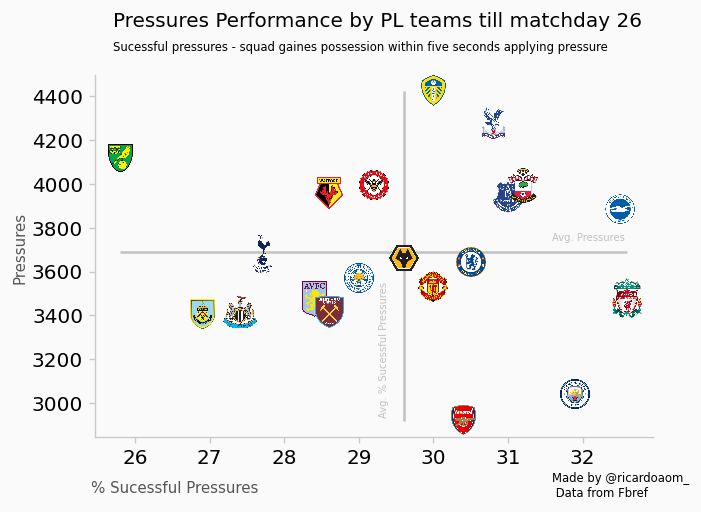

In [ ]:
# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['%'], df['Press'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['%'], row['Press']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['Press'].mean(), df['%'].min(), df['%'].max(), color='#c2c1c0')
plt.vlines(df['%'].mean(), df['Press'].min(), df['Press'].max(), color='#c2c1c0')

# Text

## Title & comment
fig.text(.15,.98,'Pressures Performance by PL teams till matchday 26 ',size=12)
fig.text(.15,.93,'Sucessful pressures - squad gaines possession within five seconds applying pressure',size=7)
fig.text(.76,0.0,'Made by @ricardoaom_\n Data from Fbref', size=7)

## Avg line explanation
fig.text(.01,.45,'Pressures', size=9, color='#575654',rotation=90)
fig.text(.12,0.01,'% Sucessful Pressures', size=9, color='#575654')

## Axes titles
fig.text(.76,.535,'Avg. Pressures', size=6, color='#c2c1c0')
fig.text(.52,.17,'Avg. % Sucessful Pressures', size=6, color='#c2c1c0',rotation=90)

## Save plot
plt.savefig('Pressures.png', dpi=1200, bbox_inches = "tight")